<a href="https://colab.research.google.com/github/Ganeshprasannamax/Car_Price/blob/main/car_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Car Price Prediction




## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


pd.set_option("display.max_columns", None)


In [4]:
data = pd.read_csv('/content/cars_price.csv')
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

## Separate data into two dataframes: 
####                                    1.) Body Variables + Target 
####                                    2.) Engine Variables + Target

In [6]:
body_data = data[["price", "wheel-base", "length", "width", "height", "curb-weight"]]
engine_data = data[["price", "engine-size", "bore", "stroke", "compression-ratio", "horsepower", "city-mpg", "highway-mpg", "peak-rpm"]]


#### Create Correlation Matricies w/Heatmaps

,wheel-base,length,width,height,curb-weight
wheel-base,1.000000,0.874587,0.795144,0.589435,0.776386
length,0.874587,1.000000,0.841118,0.491029,0.877728
width,0.795144,0.841118,1.000000,0.279210,0.867032
height,0.589435,0.491029,0.279210,1.000000,0.295572
curb-weight,0.776386,0.877728,0.867032,0.295572,1.000000


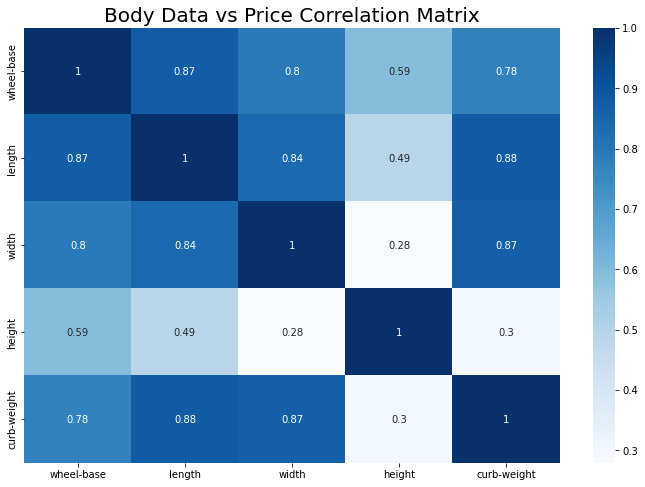

In [7]:
body_corr = body_data.corr()
display(body_corr)

fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(body_corr, cmap="Blues", annot=True)
plt.title("Body Data vs Price Correlation Matrix", fontsize=20)
plt.show()

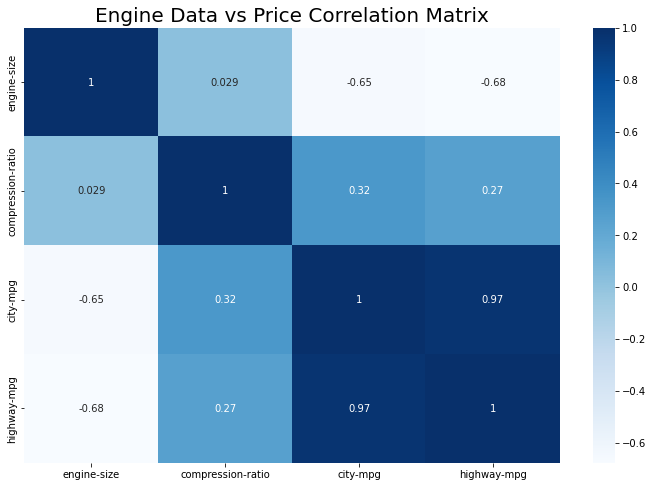

In [8]:
engine_corr = engine_data.corr()
engine_corr

fig, ax = plt.subplots(figsize=(12,8))
plt.title("Engine Data vs Price Correlation Matrix", fontsize=20)
sns.heatmap(engine_corr, cmap="Blues", annot=True)
plt.show()

## Counting the values of Categorial Data

In [9]:
data['fuel-type'].value_counts()

gas       185
diesel     20
Name: fuel-type, dtype: int64

In [10]:
data['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [11]:
data['num-of-doors'].value_counts()

four    114
two      89
?         2
Name: num-of-doors, dtype: int64

In [12]:
data['body-style'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

In [13]:
data['drive-wheels'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drive-wheels, dtype: int64

In [14]:
data['engine-location'].value_counts()

front    202
rear       3
Name: engine-location, dtype: int64

In [15]:
data['engine-type'].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: engine-type, dtype: int64

In [16]:
data['num-of-cylinders'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: num-of-cylinders, dtype: int64

In [17]:
data['fuel-system'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuel-system, dtype: int64

## Selecting the data(columns)

In [32]:
x = data.iloc[:,3:25].values
y = data.iloc[:,25].values

In [33]:
print(x)
print(y)

[['gas' 'std' 'two' ... '5000' 21 27]
 ['gas' 'std' 'two' ... '5000' 21 27]
 ['gas' 'std' 'two' ... '5000' 19 26]
 ...
 ['gas' 'std' 'four' ... '5500' 18 23]
 ['diesel' 'turbo' 'four' ... '4800' 26 27]
 ['gas' 'turbo' 'four' ... '5400' 19 25]]
['13495' '16500' '16500' '13950' '17450' '15250' '17710' '18920' '23875'
 '?' '16430' '16925' '20970' '21105' '24565' '30760' '41315' '36880'
 '5151' '6295' '6575' '5572' '6377' '7957' '6229' '6692' '7609' '8558'
 '8921' '12964' '6479' '6855' '5399' '6529' '7129' '7295' '7295' '7895'
 '9095' '8845' '10295' '12945' '10345' '6785' '?' '?' '11048' '32250'
 '35550' '36000' '5195' '6095' '6795' '6695' '7395' '10945' '11845'
 '13645' '15645' '8845' '8495' '10595' '10245' '10795' '11245' '18280'
 '18344' '25552' '28248' '28176' '31600' '34184' '35056' '40960' '45400'
 '16503' '5389' '6189' '6669' '7689' '9959' '8499' '12629' '14869' '14489'
 '6989' '8189' '9279' '9279' '5499' '7099' '6649' '6849' '7349' '7299'
 '7799' '7499' '7999' '8249' '8949' '9549' 

## Encoding Variables

In [22]:
from sklearn.preprocessing import LabelEncoder

lb_fueltype = LabelEncoder()
x[:,0] = lb_fueltype.fit_transform(x[:,0])

lb_aspiration = LabelEncoder()
x[:,1] = lb_aspiration.fit_transform(x[:,1])

lb_noofdoors = LabelEncoder()
x[:,2] = lb_noofdoors.fit_transform(x[:,2])

lb_bodystyle = LabelEncoder()
x[:,3] = lb_bodystyle.fit_transform(x[:,3])

lb_drivewheels = LabelEncoder()
x[:,4] = lb_drivewheels.fit_transform(x[:,4])

lb_enginelocation = LabelEncoder()
x[:,5] = lb_enginelocation.fit_transform(x[:,5])

lb_enginetype = LabelEncoder()
x[:,11] = lb_enginetype.fit_transform(x[:,11])

lb_numofcylinders = LabelEncoder()
x[:,12] = lb_numofcylinders.fit_transform(x[:,12])

lb_fuelsystem = LabelEncoder()
x[:,14] = lb_fuelsystem.fit_transform(x[:,14])

## Analyze Target Variable : Price

In [23]:
pd.DataFrame(data.price.describe()) 

,price
count,205
unique,187
top,?
freq,4


#### Analyze Numerical Variables

In [24]:
num_df = data.drop(["symboling"], axis=1) 
num_df.describe()

,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


#### Create New Features


In [25]:
# Create make column using CarName variable
# Find the count of make
data["make"] = data["make"].str.split(" ").str[0]
top_10_make = pd.Series(data["make"].value_counts().head(n=10))
top_10_make_perc = pd.Series(data["make"].value_counts(normalize=True).head(n=10))

px.bar(top_10_make, title="Top 10 Vehicle Manufacturers (make)")

In [26]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


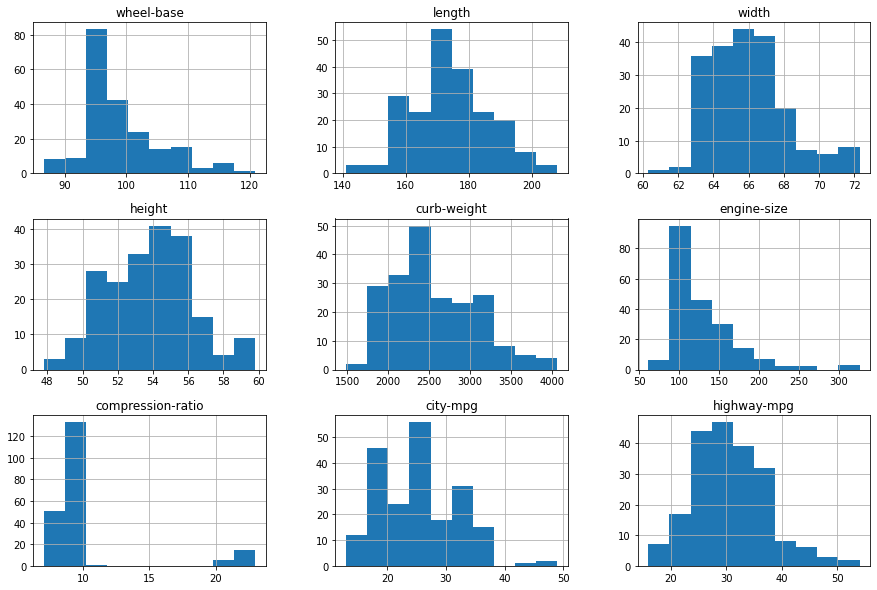

In [27]:
#fig, ax = plt.subplots(figsize=(10,6))
hist_data = data.drop("symboling", axis=1)

ax = hist_data.hist(figsize=(15,10))
plt.show()

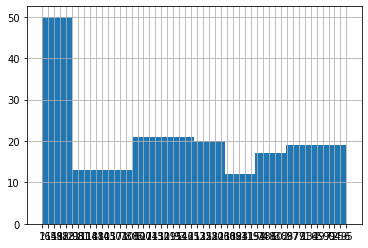

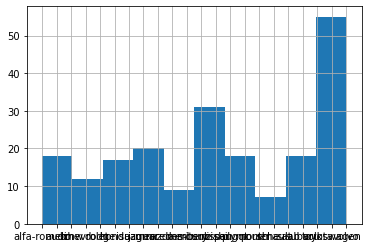

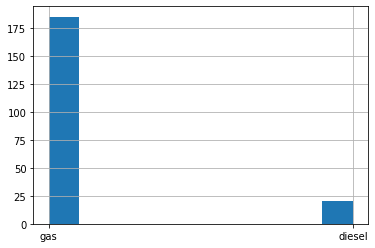

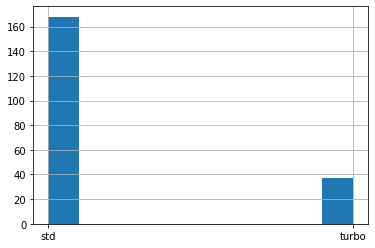

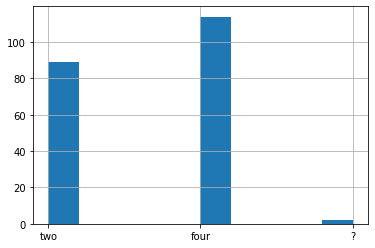

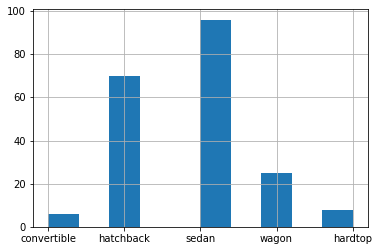

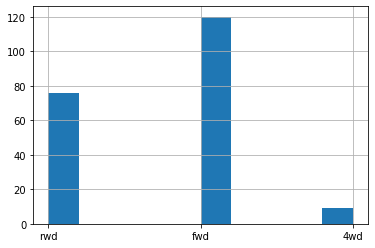

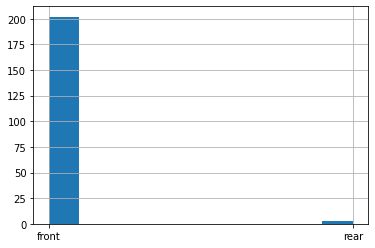

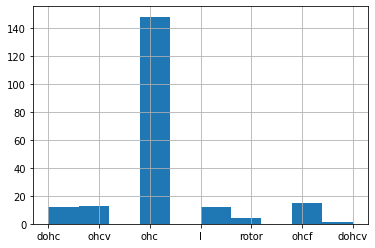

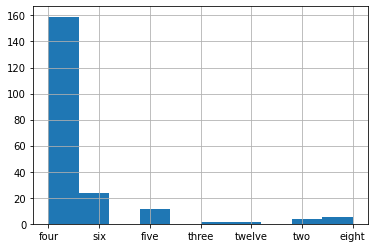

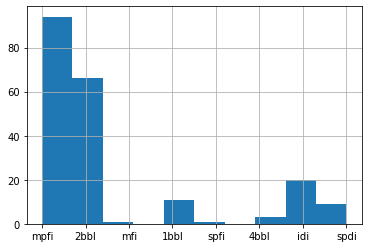

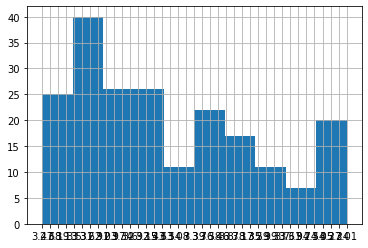

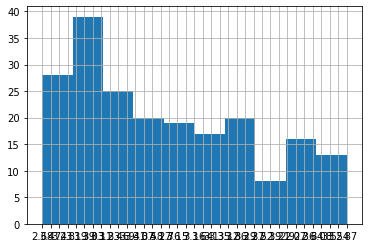

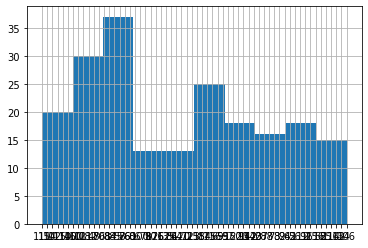

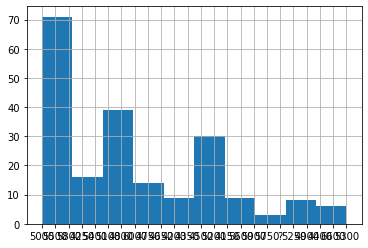

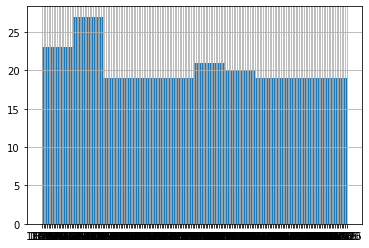

In [28]:
categorical_data = data.select_dtypes(exclude=["int", "float"])
categorical_data

for x in categorical_data.columns:

    fig, ax = plt.subplots()
    categorical_data[x].hist()
    plt.show()

In [29]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


## Splitting the dataset into Train & Test

In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [61]:
print(x_train)


[['gas' 'turbo' 'two' ... '5000' 19 24]
 ['gas' 'std' 'four' ... '5200' 19 24]
 ['gas' 'std' 'four' ... '4800' 27 32]
 ...
 ['gas' 'std' 'two' ... '4750' 16 18]
 ['gas' 'std' 'two' ... '4400' 26 31]
 ['gas' 'std' 'two' ... '5800' 27 33]]


In [63]:
print(x_test)

[['gas' 'std' 'two' ... '5500' 31 38]
 ['gas' 'std' 'four' ... '5200' 31 37]
 ['gas' 'std' 'two' ... '4800' 31 38]
 ...
 ['gas' 'std' 'two' ... '4800' 29 34]
 ['gas' 'std' 'two' ... '6000' 17 23]
 ['gas' 'std' 'four' ... '4200' 27 32]]


In [65]:
print(y_train)

['12764' '15750' '7898' '6695' '7299' '9960' '19699' '11850' '10345'
 '36880' '15250' '5348' '18950' '35550' '9298' '18344' '17075' '7395'
 '7349' '7609' '5499' '11549' '8921' '20970' '34028' '14399' '15985'
 '7788' '8949' '8499' '9995' '12940' '21105' '12629' '15998' '7975' '?'
 '13200' '7295' '9538' '13295' '7898' '16900' '6918' '21485' '5572'
 '18420' '16503' '5572' '6649' '8495' '16500' '31600' '6989' '8778'
 '17710' '8449' '13495' '7738' '6189' '16695' '18280' '10945' '16845'
 '9279' '11595' '11048' '45400' '6849' '8013' '9279' '22470' '16430'
 '5399' '14869' '8358' '9549' '22018' '7957' '32528' '?' '9988' '17199'
 '9495' '15510' '15580' '12290' '11245' '30760' '12945' '9639' '12440'
 '9959' '6795' '7609' '5389' '6785' '6229' '13950' '10698' '36000' '11694'
 '9895' '13415' '6479' '6692' '16630' '15690' '23875' '8495' '37028'
 '16500' '13645' '6377' '10595' '10795' '18920' '19045' '7126' '8189'
 '7499' '28248' '5195' '7775' '7198' '6938' '7053' '7463' '13499' '6575'
 '16558' '6692'

In [64]:
print(y_test)

['6669' '7999' '6338' '?' '10295' '25552' '8249' '5151' '6488' '10245'
 '17450' '17669' '16515' '9095' '12964' '11199' '9980' '6529' '18150'
 '11259' '8948' '6855' '16925' '7957' '9989' '7129' '14489' '7995' '6229'
 '7295' '8058' '8921' '41315' '9295' '17950' '7775' '8558' '32250' '15645'
 '22625' '5118' '18399' '7099' '10198' '8195' '7799' '40960' '6095'
 '18150' '13499' '28176' '11900' '24565' '9258' '8845' '6295' '11248'
 '8845' '13860' '8238' '11845' '10898']


# R2, MAE score details 

In [54]:
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [57]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
RidgeModel = RidgeCV(alphas=np.arange(0.01, 1, 0.01), cv=cv, scoring='neg_mean_absolute_error')
RidgeModel.fit(x_train, y_train)

r2_score = RidgeModel.score(x_train, y_train)
Ypredict = RidgeModel.predict(x_test)
mae = metrics.mean_absolute_error(y_test, Ypredict)
print(f'The r2_score of Ridge model is {round(r2_score, 2)}\nThe MAE of Ridge Model is {round(mae, 2)}')

In [ ]:
ETModel = ExtraTreesRegressor(n_estimators=500, max_depth=10, max_features=0.3, random_state=0)
ETModel.fit(x_train, y_train)
r2_score = ETModel.score(x_test, y_test)
Ypredict = ETModel.predict(x_test)
mae = metrics.mean_absolute_error(y_test, Ypredict)
print(f'The r2_score of Extra Trees model is {round(r2_score, 2)}\nThe MAE of Extra Trees Model is {round(mae, 2)}')

In [ ]:
LGBMModel = LGBMRegressor()
LGBMModel.fit(x_train, y_train)

r2_score = LGBMModel.score(x_test, y_test)
Ypredict = LGBMModel.predict(Xtest)
mae = metrics.mean_absolute_error(Ytest, Ypredict)
print(f'The r2_score of LightBM model is {round(r2_score, 2)}\nThe MAE of LightBM Model is {round(mae, 2)}')

In [ ]:
GBRModel = GradientBoostingRegressor(**GBRparams)
GBRModel.fit(x_train, y_train)

r2_score = GBRModel.score(x_test, y_test)
Ypredict = GBRModel.predict(Xtest)
mae = metrics.mean_absolute_error(Ytest, Ypredict)
print(f'The r2_score of Gradient Boosting model is {round(r2_score, 2)}\nThe MAE of Gradient Boosting Model is {round(mae, 2)}')

In [ ]:
RFModel = RandomForestRegressor(n_estimators=500, random_state=0)
RFModel.fit(x_train, y_train)

r2_score = RFModel.score(x_test, y_test)
Ypredict = RFModel.predict(Xtest)
mae = metrics.mean_absolute_error(Ytest, Ypredict)
print(f'The r2_score of Random Forest model is {round(r2_score, 2)}\nThe MAE of Random Forest Model is {round(mae, 2)}')